In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [156]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [157]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [158]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
import matplotlib.pyplot as plt

In [160]:
X=data.iloc[:,1:].values
Y=data.iloc[:,0]

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
Xs=StandardScaler()
XS=Xs.fit_transform(X)

In [162]:
X.shape

(42000, 784)

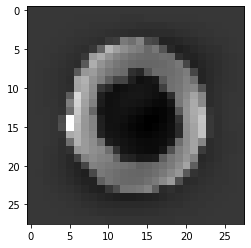

In [196]:
plt.imshow(XS[1].reshape(28,28),cmap="gray")

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(XS,Y,test_size=0.2)

In [271]:
classifier=Sequential()


In [272]:
classifier.add(Dense(units=1000,activation="relu",input_dim=784))

In [273]:
classifier.add(Dense(units=500,activation="relu"))
classifier.add(Dense(units=500,activation="relu"))
classifier.add(Dense(units=100,activation="relu"))
classifier.add(Dense(units=50,activation="relu"))


In [274]:
classifier.add(Dense(units=50,activation="relu"))

In [275]:
classifier.add(Dense(units=10,activation="sigmoid"))

In [276]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_42 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_43 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_44 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_45 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_47 (Dense)             (None, 10)               

In [277]:
classifier.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [278]:
model=classifier.fit(XS,Y,validation_split=0.3,batch_size=1000,epochs=100)

Epoch 1/100
30/30 [==============================] - 3s 79ms/step - loss: 1.2731 - accuracy: 0.6446 - val_loss: 0.2785 - val_accuracy: 0.9178
Epoch 2/100
30/30 [==============================] - 2s 69ms/step - loss: 0.2150 - accuracy: 0.9333 - val_loss: 0.1791 - val_accuracy: 0.9464
Epoch 3/100
30/30 [==============================] - 2s 68ms/step - loss: 0.1288 - accuracy: 0.9625 - val_loss: 0.1541 - val_accuracy: 0.9545
Epoch 4/100
30/30 [==============================] - 2s 68ms/step - loss: 0.0896 - accuracy: 0.9735 - val_loss: 0.1418 - val_accuracy: 0.9567
Epoch 5/100
30/30 [==============================] - 2s 68ms/step - loss: 0.0677 - accuracy: 0.9806 - val_loss: 0.1332 - val_accuracy: 0.9609
Epoch 6/100
30/30 [==============================] - 2s 70ms/step - loss: 0.0482 - accuracy: 0.9876 - val_loss: 0.1322 - val_accuracy: 0.9612
Epoch 7/100
30/30 [==============================] - 2s 69ms/step - loss: 0.0347 - accuracy: 0.9911 - val_loss: 0.1277 - val_accuracy: 0.9636
Epoch 

In [ ]:
# classifier.evaluate(xtest,ytest)

In [176]:
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


In [279]:
X_test=test.values

In [280]:
yp=classifier.predict(Xs.transform(X_test))

In [281]:
len(yp)

28000

In [282]:
np.argmax(yp[2399])

9

In [283]:
len(yp)

28000

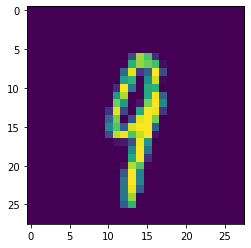

In [284]:
plt.imshow(X_test[2399].reshape(28,28))

In [285]:
ypred=[]
for i in yp:
    ypred.append((np.argmax(i)))

In [286]:
ypred[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

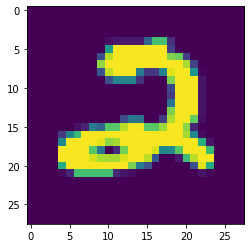

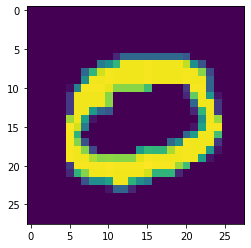

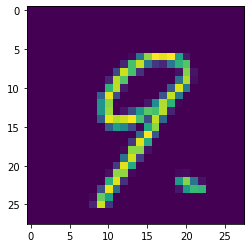

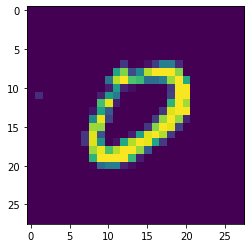

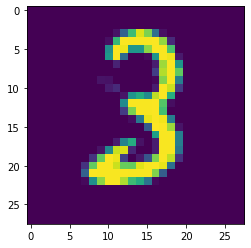

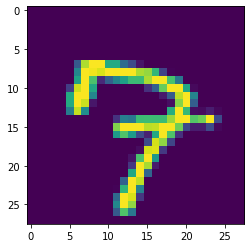

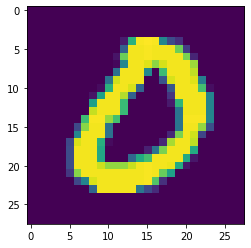

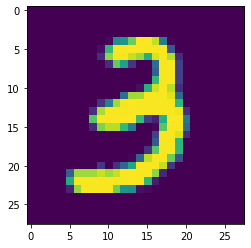

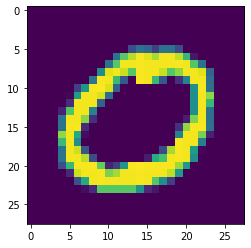

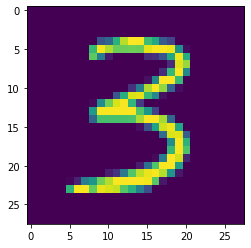

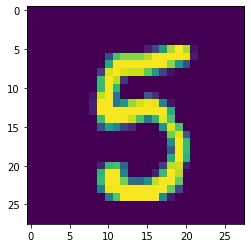

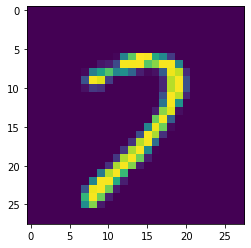

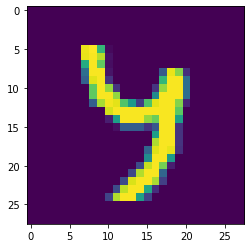

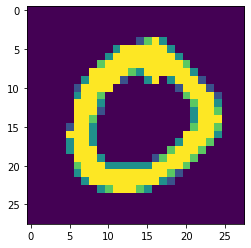

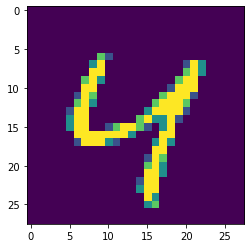

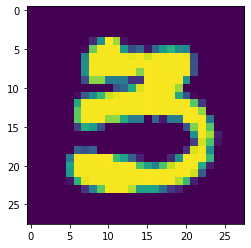

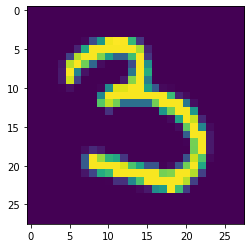

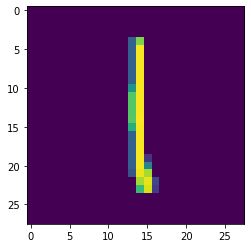

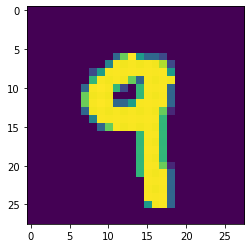

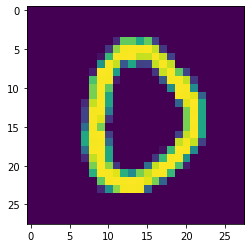

In [287]:
for k in range(20):
    plt.imshow(X_test[k].reshape(28,28))
    plt.show()

In [288]:
output=pd.DataFrame(np.arange(1,len(X_test)+1),columns=["ImageId"])

In [289]:
output["Label"]=ypred

In [290]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [291]:
output.to_csv("final6.csv",index=False)

In [260]:
test.value_counts()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  